<a href="https://colab.research.google.com/github/Alisser2001/QuantumMachineLearning/blob/emmadev/LOFElevatorsQML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

# URL del archivo raw en GitHub
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/elevators.dat"

# Descargar el contenido del archivo
response = requests.get(url)
lines = [line.strip() for line in response.text.splitlines()]

# Extraer atributos
attributes = [line.split()[1] for line in lines if line.startswith("@attribute")]

# Extraer datos (después de @data)
data_start = lines.index("@data") + 1
data = [line.split(",") for line in lines[data_start:] if line]

# Crear DataFrame
df = pd.DataFrame(data, columns=attributes).astype(float)

print(df.head())


   ClimbRate   Sgz     P     Q  CurRoll  AbsRoll  DiffClb  DiffRollRate  \
0     -178.0  40.0 -0.11  0.13      1.1     -9.0    -12.0        -0.011   
1     -122.0   9.0  0.27  0.05      0.0    -10.0     -2.0        -0.005   
2      196.0 -10.0 -0.44  0.10      0.6    -10.0     -7.0         0.003   
3      507.0  -6.0  0.14  0.10     -0.2    -10.0      2.0         0.001   
4     -189.0 -67.0 -0.60 -0.08      0.5    -14.0     17.0        -0.017   

   DiffDiffClb  SaTime1  SaTime2  SaTime3  SaTime4  DiffSaTime1  DiffSaTime2  \
0          0.0  -0.0007  -0.0007  -0.0007  -0.0007       0.0000          0.0   
1          0.4  -0.0007  -0.0007  -0.0007  -0.0007       0.0000          0.0   
2          0.2  -0.0006  -0.0006  -0.0006  -0.0006       0.0000          0.0   
3         -0.7  -0.0007  -0.0006  -0.0006  -0.0006      -0.0001          0.0   
4         -0.7  -0.0013  -0.0013  -0.0013  -0.0013       0.0000          0.0   

   DiffSaTime3  DiffSaTime4      Sa   Goal  
0          0.0         

In [2]:
# =========================
# SETUP: paleta 'pastel' (nativa de seaborn)
# =========================
import math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

palette_name = "pastel"
sns.set_theme(style="whitegrid", context="notebook", palette=palette_name, font_scale=1.05)
pal = sns.color_palette(palette_name)

# colores explícitos extraídos de la paleta
color_main  = pal[2]    # para histogramas / puntos
color_kde   = pal[1]    # para KDE / líneas suaves
color_accent= pal[-1]   # para líneas de regresión o destaque
box_color   = pal[0]    # para boxplots inset

print("Paleta aplicada:", palette_name, " — Colores:", pal)


Paleta aplicada: pastel  — Colores: [(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274), (0.5529411764705883, 0.8980392156862745, 0.6313725490196078), (1.0, 0.6235294117647059, 0.6078431372549019), (0.8156862745098039, 0.7333333333333333, 1.0), (0.8705882352941177, 0.7333333333333333, 0.6078431372549019), (0.9803921568627451, 0.6901960784313725, 0.8941176470588236), (0.8117647058823529, 0.8117647058823529, 0.8117647058823529), (1.0, 0.996078431372549, 0.6392156862745098), (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


In [3]:
# Vista rápida de los datos
print("Dimensiones:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nDescripción estadística:")
display(df.describe().T)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nTipo de datos por columna:")
print(df.dtypes)

Dimensiones: (16599, 19)

Primeras filas:


ClimbRate   Sgz     P     Q  CurRoll  AbsRoll  DiffClb  DiffRollRate  \
0     -178.0  40.0 -0.11  0.13      1.1     -9.0    -12.0        -0.011   
1     -122.0   9.0  0.27  0.05      0.0    -10.0     -2.0        -0.005   
2      196.0 -10.0 -0.44  0.10      0.6    -10.0     -7.0         0.003   
3      507.0  -6.0  0.14  0.10     -0.2    -10.0      2.0         0.001   
4     -189.0 -67.0 -0.60 -0.08      0.5    -14.0     17.0        -0.017   

   DiffDiffClb  SaTime1  SaTime2  SaTime3  SaTime4  DiffSaTime1  DiffSaTime2  \
0          0.0  -0.0007  -0.0007  -0.0007  -0.0007       0.0000          0.0   
1          0.4  -0.0007  -0.0007  -0.0007  -0.0007       0.0000          0.0   
2          0.2  -0.0006  -0.0006  -0.0006  -0.0006       0.0000          0.0   
3         -0.7  -0.0007  -0.0006  -0.0006  -0.0006      -0.0001          0.0   
4         -0.7  -0.0013  -0.0013  -0.0013  -0.0013       0.0000          0.0   

   DiffSaTime3  DiffSaTime4      Sa   Goal  
0          0.0          0.0 -0.0007  0.018  
1          0.0          0.0 -0.0007  0.017  
2          0.0          0.0 -0.0006  0.021  
3          0.0          0.0 -0.0006  0.024  
4          0.0          0.0 -0.0013  0.018


Descripción estadística:


count          mean         std       min       25%      50%  \
ClimbRate     16599.0 -1.179577e+01  277.593632 -993.0000 -200.0000 -31.0000   
Sgz           16599.0 -1.279878e+01   25.439814  -99.0000  -29.0000 -13.0000   
P             16599.0 -1.007591e-02    0.310457   -1.3700   -0.2300   0.0000   
Q             16599.0  5.449003e-02    0.115866   -0.4500   -0.0300   0.0500   
CurRoll       16599.0  4.689439e-02    0.951701   -3.0000   -0.6000   0.1000   
AbsRoll       16599.0 -1.078963e+01    4.102681  -23.0000  -13.0000 -10.0000   
DiffClb       16599.0 -5.697934e-01   10.568555  -56.0000   -8.0000   0.0000   
DiffRollRate  16599.0 -1.049039e-03    0.012587   -0.0840   -0.0090  -0.0010   
DiffDiffClb   16599.0 -3.397795e-02    0.949416   -8.3000   -0.2000  -0.1000   
SaTime1       16599.0 -7.504789e-04    0.000402   -0.0035   -0.0009  -0.0007   
SaTime2       16599.0 -7.541539e-04    0.000407   -0.0035   -0.0009  -0.0007   
SaTime3       16599.0 -7.541719e-04    0.000408   -0.0035   -0.0009  -0.0007   
SaTime4       16599.0 -7.565396e-04    0.000410   -0.0034   -0.0010  -0.0007   
DiffSaTime1   16599.0 -9.241521e-06    0.000086   -0.0007    0.0000   0.0000   
DiffSaTime2   16599.0  1.807338e-08    0.000002    0.0000    0.0000   0.0000   
DiffSaTime3   16599.0 -3.403820e-06    0.000058   -0.0006    0.0000   0.0000   
DiffSaTime4   16599.0  3.012230e-08    0.000002    0.0000    0.0000   0.0000   
Sa            16599.0 -7.565757e-04    0.000410   -0.0034   -0.0010  -0.0007   
Goal          16599.0  2.162498e-02    0.006717    0.0120    0.0180   0.0200   

                   75%       max  
ClimbRate     177.0000  973.0000  
Sgz             3.0000   94.0000  
P               0.2200    1.0900  
Q               0.1300    0.6900  
CurRoll         0.7000    2.9000  
AbsRoll        -7.0000   -3.0000  
DiffClb         6.0000   45.0000  
DiffRollRate    0.0070    0.0560  
DiffDiffClb     0.1000    8.5000  
SaTime1        -0.0005    0.0000  
SaTime2        -0.0005    0.0000  
SaTime3        -0.0005    0.0000  
SaTime4        -0.0005    0.0000  
DiffSaTime1     0.0000    0.0007  
DiffSaTime2     0.0000    0.0002  
DiffSaTime3     0.0000    0.0005  
DiffSaTime4     0.0000    0.0002  
Sa             -0.0005    0.0000  
Goal            0.0230    0.0780


Valores nulos por columna:
ClimbRate       0
Sgz             0
P               0
Q               0
CurRoll         0
AbsRoll         0
DiffClb         0
DiffRollRate    0
DiffDiffClb     0
SaTime1         0
SaTime2         0
SaTime3         0
SaTime4         0
DiffSaTime1     0
DiffSaTime2     0
DiffSaTime3     0
DiffSaTime4     0
Sa              0
Goal            0
dtype: int64

Tipo de datos por columna:
ClimbRate       float64
Sgz             float64
P               float64
Q               float64
CurRoll         float64
AbsRoll         float64
DiffClb         float64
DiffRollRate    float64
DiffDiffClb     float64
SaTime1         float64
SaTime2         float64
SaTime3         float64
SaTime4         float64
DiffSaTime1     float64
DiffSaTime2     float64
DiffSaTime3     float64
DiffSaTime4     float64
Sa              float64
Goal            float64
dtype: object


confirmamos que no hay valores nulos y que todos son números, por lo tanto no es necesario pensar en una transformación ni en una imputación de datos

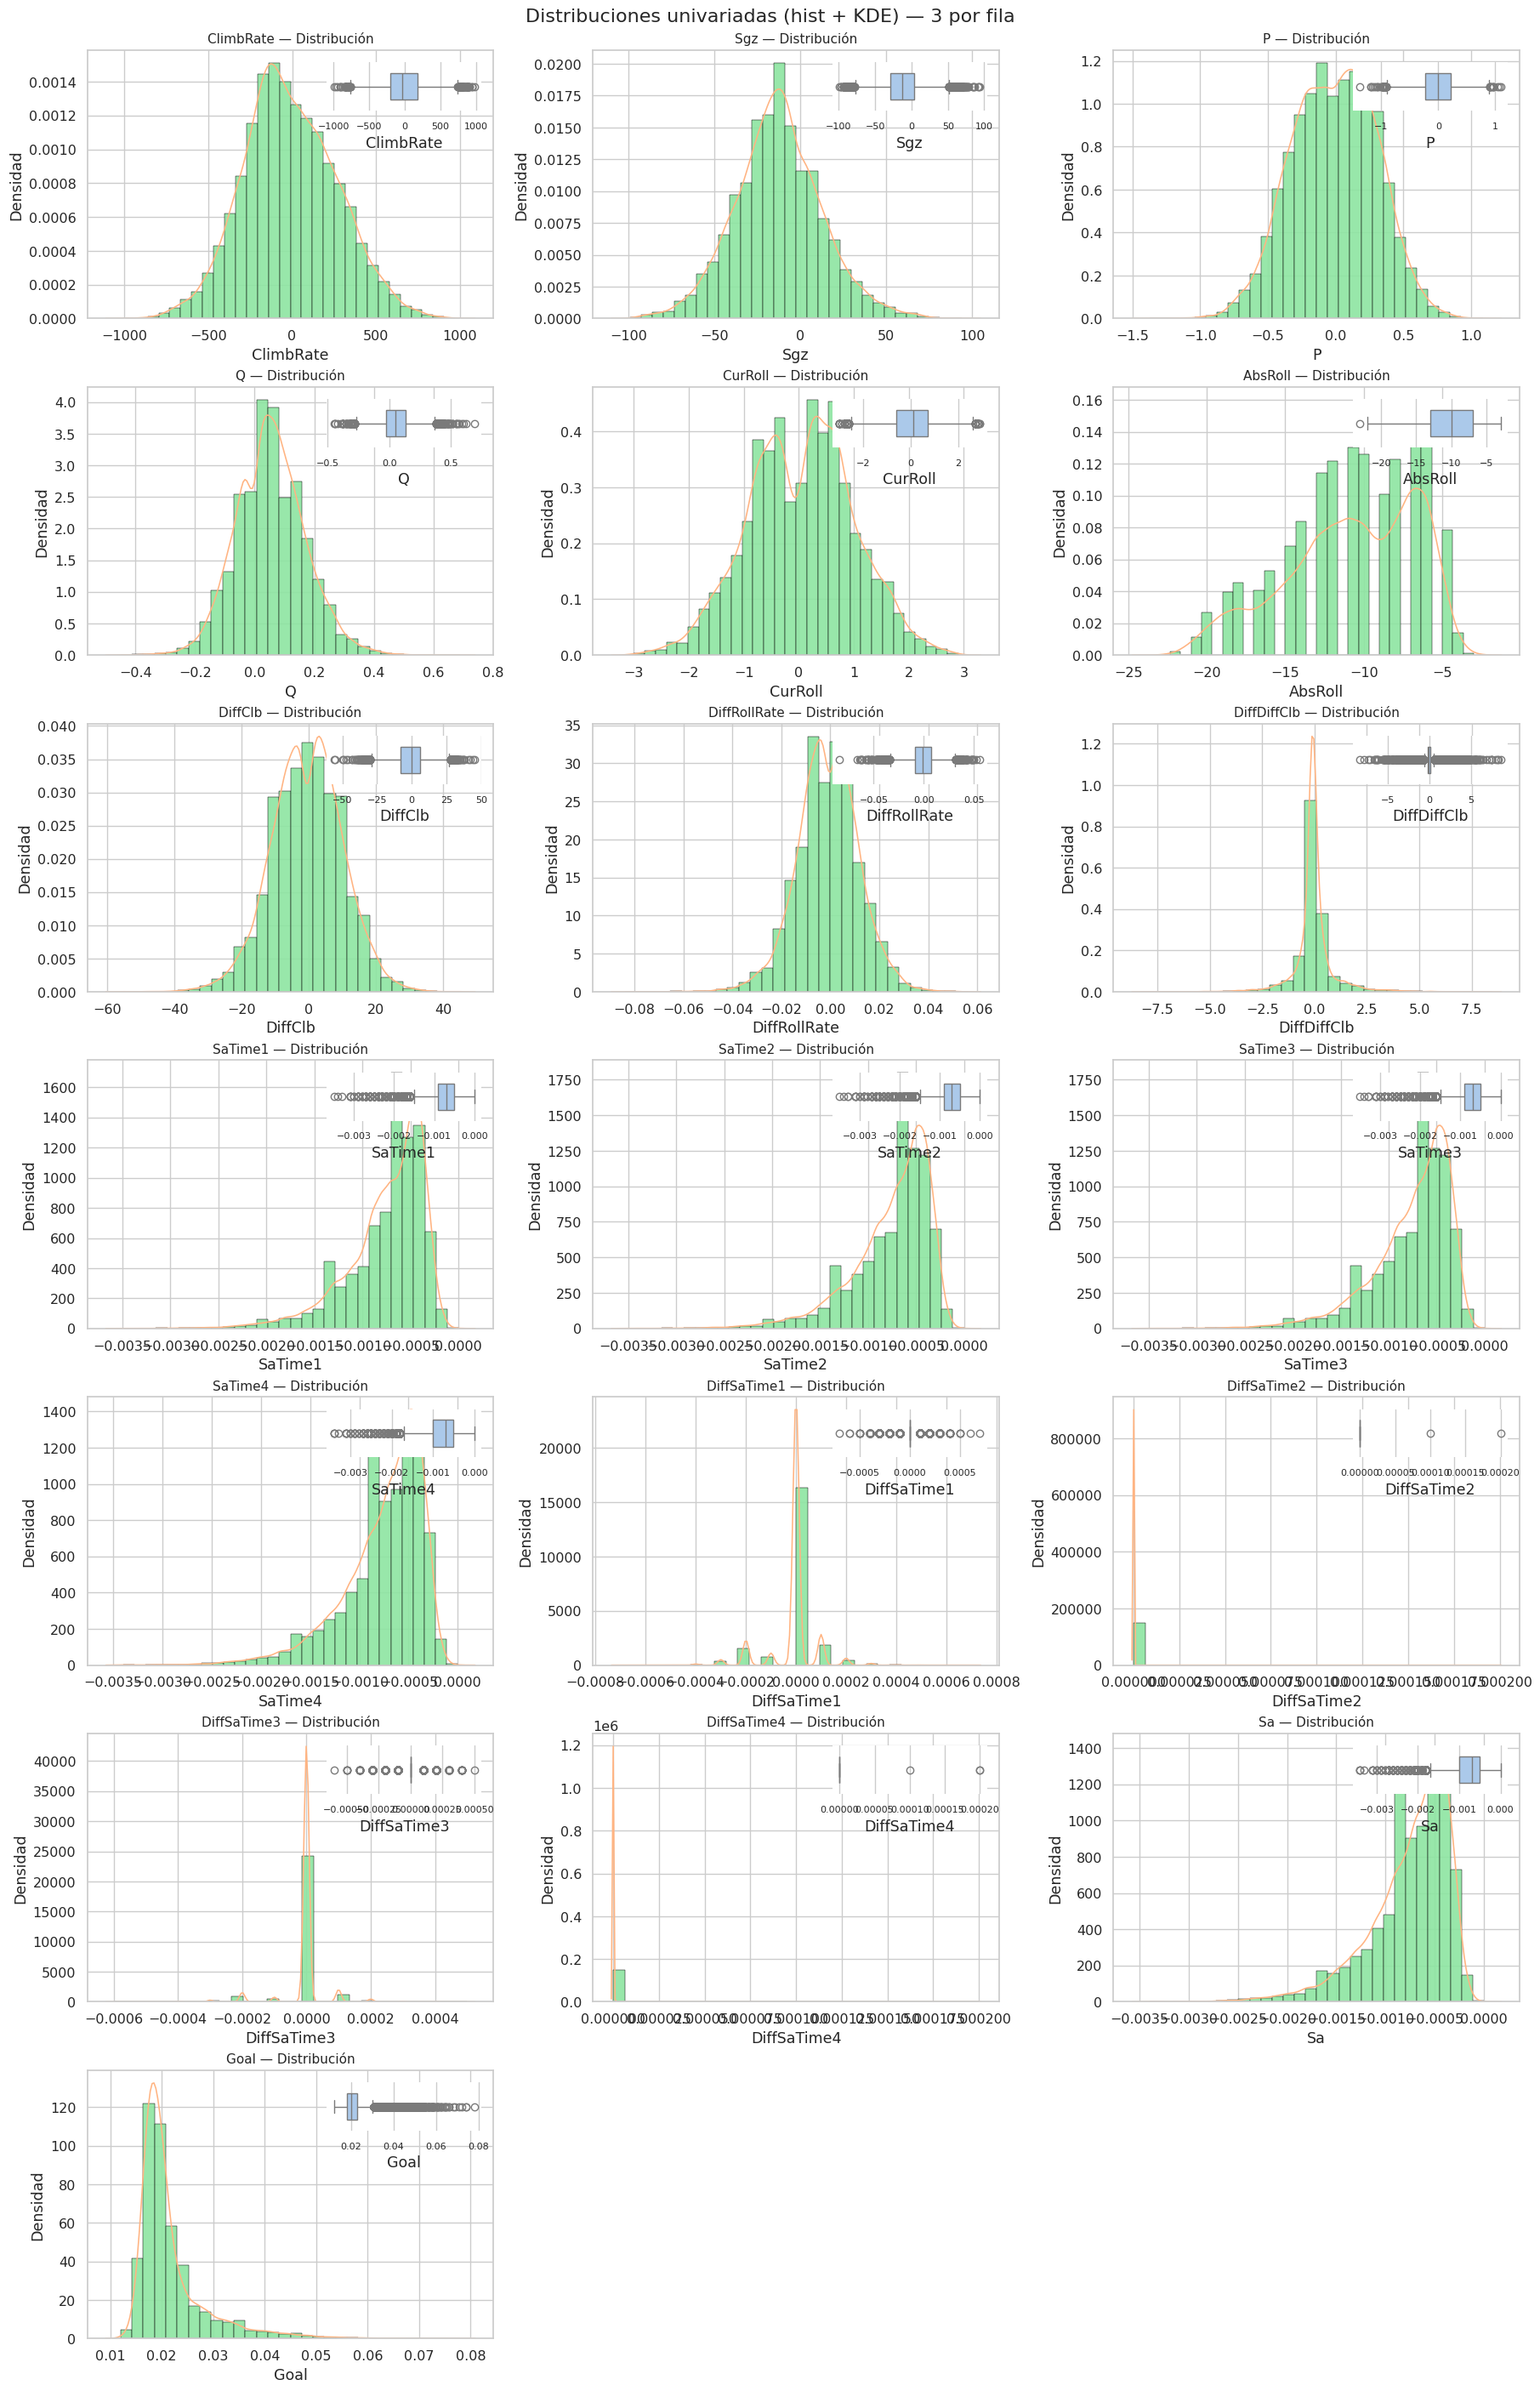

In [4]:
cols = df.columns.tolist()
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")

    axins = inset_axes(ax, width="38%", height="18%", loc='upper right', borderpad=0.9)
    sns.boxplot(x=df[col], ax=axins, orient="h", width=0.55, color=box_color)
    axins.set_yticks([])
    axins.tick_params(axis='both', which='both', labelsize=8)
    for spine in axins.spines.values():
        spine.set_visible(False)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])


fig.suptitle("Distribuciones univariadas (hist + KDE) — 3 por fila", fontsize=16)

plt.show()


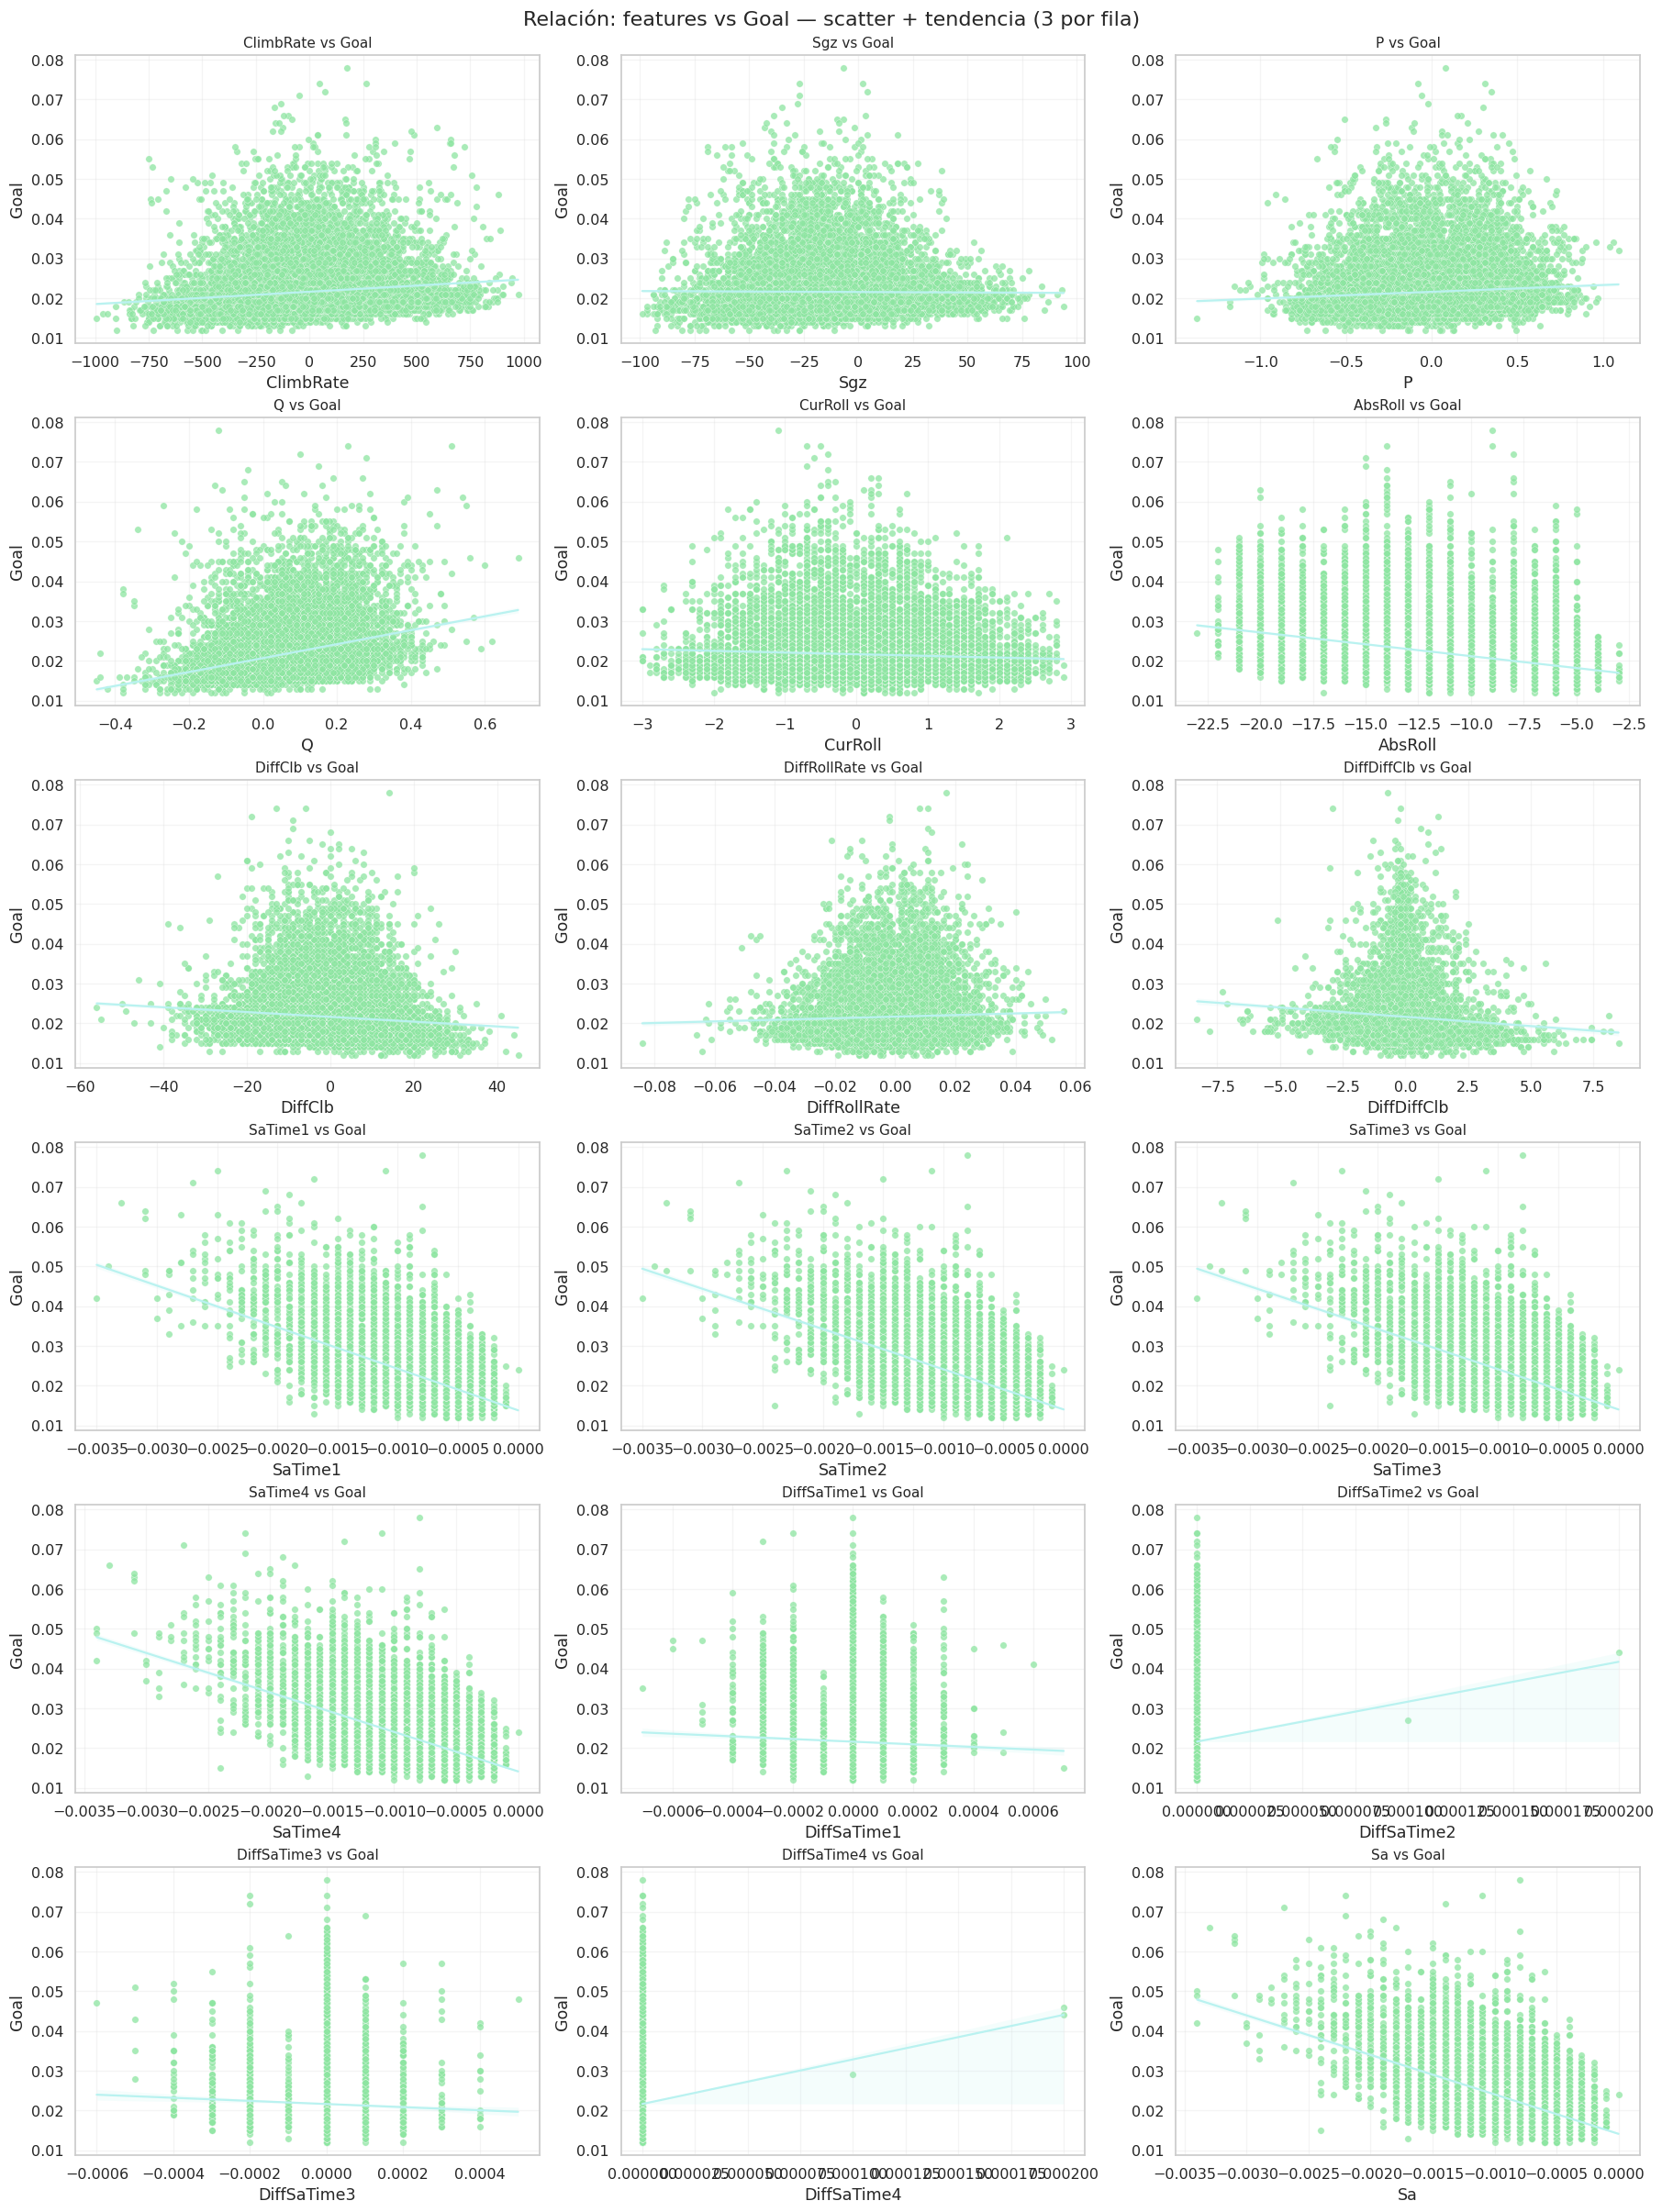

In [5]:
target = "Goal"
features = [c for c in df.columns if c != target]
n = len(features)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.scatterplot(x=df[feat], y=df[target], ax=ax,
                    color=color_main, edgecolor="w", linewidth=0.25, s=28, alpha=0.75)
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, truncate=True,
                line_kws={"linewidth":1.6, "color": color_accent})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.grid(alpha=0.2)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle(f"Relación: features vs {target} — scatter + tendencia (3 por fila)", fontsize=16)
plt.show()


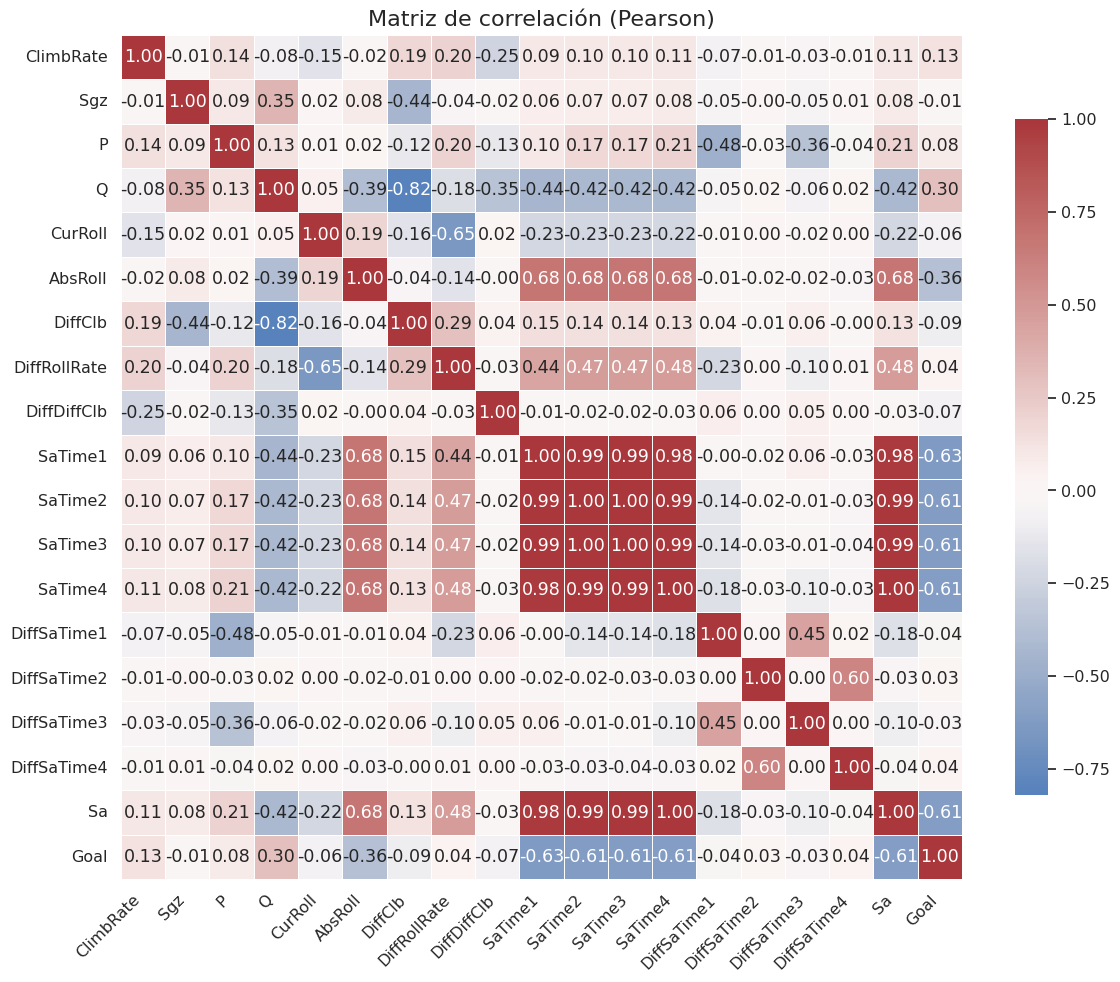


Correlación con la variable objetivo (orden descendente):


Goal            1.000000
Q               0.301956
ClimbRate       0.128301
P               0.079040
DiffSaTime4     0.038859
DiffRollRate    0.037652
DiffSaTime2     0.025905
Sgz            -0.009006
DiffSaTime3    -0.033782
DiffSaTime1    -0.042784
CurRoll        -0.059779
DiffDiffClb    -0.066229
DiffClb        -0.094931
AbsRoll        -0.364708
SaTime4        -0.606615
Sa             -0.606698
SaTime2        -0.613627
SaTime3        -0.613668
SaTime1        -0.626471
Name: Goal, dtype: float64

In [6]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths=0.5, cbar_kws={"shrink":0.8})
plt.title("Matriz de correlación (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelación con la variable objetivo (orden descendente):")
display(corr[target].sort_values(ascending=False))





---



In [7]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [8]:

# Parámetros
features = df.columns.tolist()  # lista explícita

X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Ajustar LOF
lof = LocalOutlierFactor(novelty=False)
y_pred = lof.fit_predict(X_scaled)  # 1 -> inlier, -1 -> outlier
neg_lof_scores = lof.negative_outlier_factor_  # valores negativos: más negativo = más atípico
# convertimos a score positivo (cuanto mayor, más atípico)
lof_score = -neg_lof_scores

In [9]:
# Añadir columnas al DataFrame original (no escala)
df = df.copy()  # evitar modificar df original fuera del scope
df["lof_score"] = lof_score
df["is_outlier"] = y_pred == -1

# 4) Resumen rápido
n_outliers = df["is_outlier"].sum()
print(f"Total de muestras: {len(df)}")
print(f"Outliers detectados (is_outlier=True): {n_outliers}  —  Contamination usado: {20}")

# Mostrar top N más atípicos (por lof_score)
top_n = 10
print(f"\nTop {top_n} muestras más atípicas (por lof_score):")
display(df.sort_values("lof_score", ascending=False).head(top_n))

# 5) Visualizaciones: univariadas y bivariadas con outliers destacados
cols = features
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

Total de muestras: 16599
Outliers detectados (is_outlier=True): 233  —  Contamination usado: 20

Top 10 muestras más atípicas (por lof_score):


ClimbRate   Sgz     P     Q  CurRoll  AbsRoll  DiffClb  DiffRollRate  \
13342     -288.0 -10.0 -0.96  0.25      0.2    -21.0     -2.0         0.013   
950       -319.0 -30.0 -0.42  0.31      0.1    -17.0    -17.0        -0.012   
1299      -290.0 -11.0 -0.91  0.23      0.0    -21.0     -2.0         0.021   
4012        56.0  41.0 -0.84  0.22      0.1    -19.0     -5.0        -0.010   
3143      -238.0 -29.0 -1.37  0.20      0.8    -12.0    -16.0        -0.084   
7638       398.0 -16.0  0.21  0.51      0.3    -21.0    -19.0        -0.045   
15381      -29.0 -40.0  0.48  0.41     -1.0     -7.0    -55.0         0.013   
13256     -110.0 -21.0 -0.52  0.37      1.3    -11.0    -14.0        -0.037   
15186       17.0  70.0  0.21 -0.17     -1.0     -7.0     16.0         0.010   
6212        81.0 -40.0  0.45  0.49     -1.1     -7.0    -56.0         0.016   

       DiffDiffClb  SaTime1  ...  SaTime3  SaTime4  DiffSaTime1  DiffSaTime2  \
13342          0.1  -0.0018  ...  -0.0020  -0.0020       0.0000       0.0002   
950            0.1  -0.0015  ...  -0.0016  -0.0016       0.0000       0.0001   
1299           0.4  -0.0015  ...  -0.0018  -0.0018       0.0003       0.0000   
4012           0.0  -0.0017  ...  -0.0017  -0.0017       0.0000       0.0000   
3143           0.1  -0.0017  ...  -0.0024  -0.0024       0.0007       0.0000   
7638          -1.0  -0.0035  ...  -0.0035  -0.0034       0.0000       0.0000   
15381          1.1  -0.0002  ...  -0.0002  -0.0002      -0.0001       0.0000   
13256         -6.5  -0.0009  ...  -0.0013  -0.0013       0.0004       0.0000   
15186          0.3  -0.0003  ...  -0.0003  -0.0002       0.0000       0.0000   
6212          -2.3  -0.0002  ...  -0.0002  -0.0001      -0.0002       0.0000   

       DiffSaTime3  DiffSaTime4      Sa   Goal  lof_score  is_outlier  
13342       0.0000       0.0002 -0.0022  0.044  48.279135        True  
950         0.0000       0.0000 -0.0017  0.027  29.978479        True  
1299        0.0000       0.0002 -0.0020  0.046  28.631513        True  
4012        0.0000       0.0001 -0.0018  0.029  19.945739        True  
3143        0.0000       0.0000 -0.0024  0.015   2.361863        True  
7638       -0.0003       0.0000 -0.0034  0.042   2.169445        True  
15381      -0.0002       0.0000 -0.0002  0.021   2.003845        True  
13256       0.0000       0.0000 -0.0013  0.020   1.954854        True  
15186      -0.0001       0.0000 -0.0002  0.019   1.936873        True  
6212       -0.0001       0.0000 -0.0001  0.024   1.916571        True  

[10 rows x 21 columns]

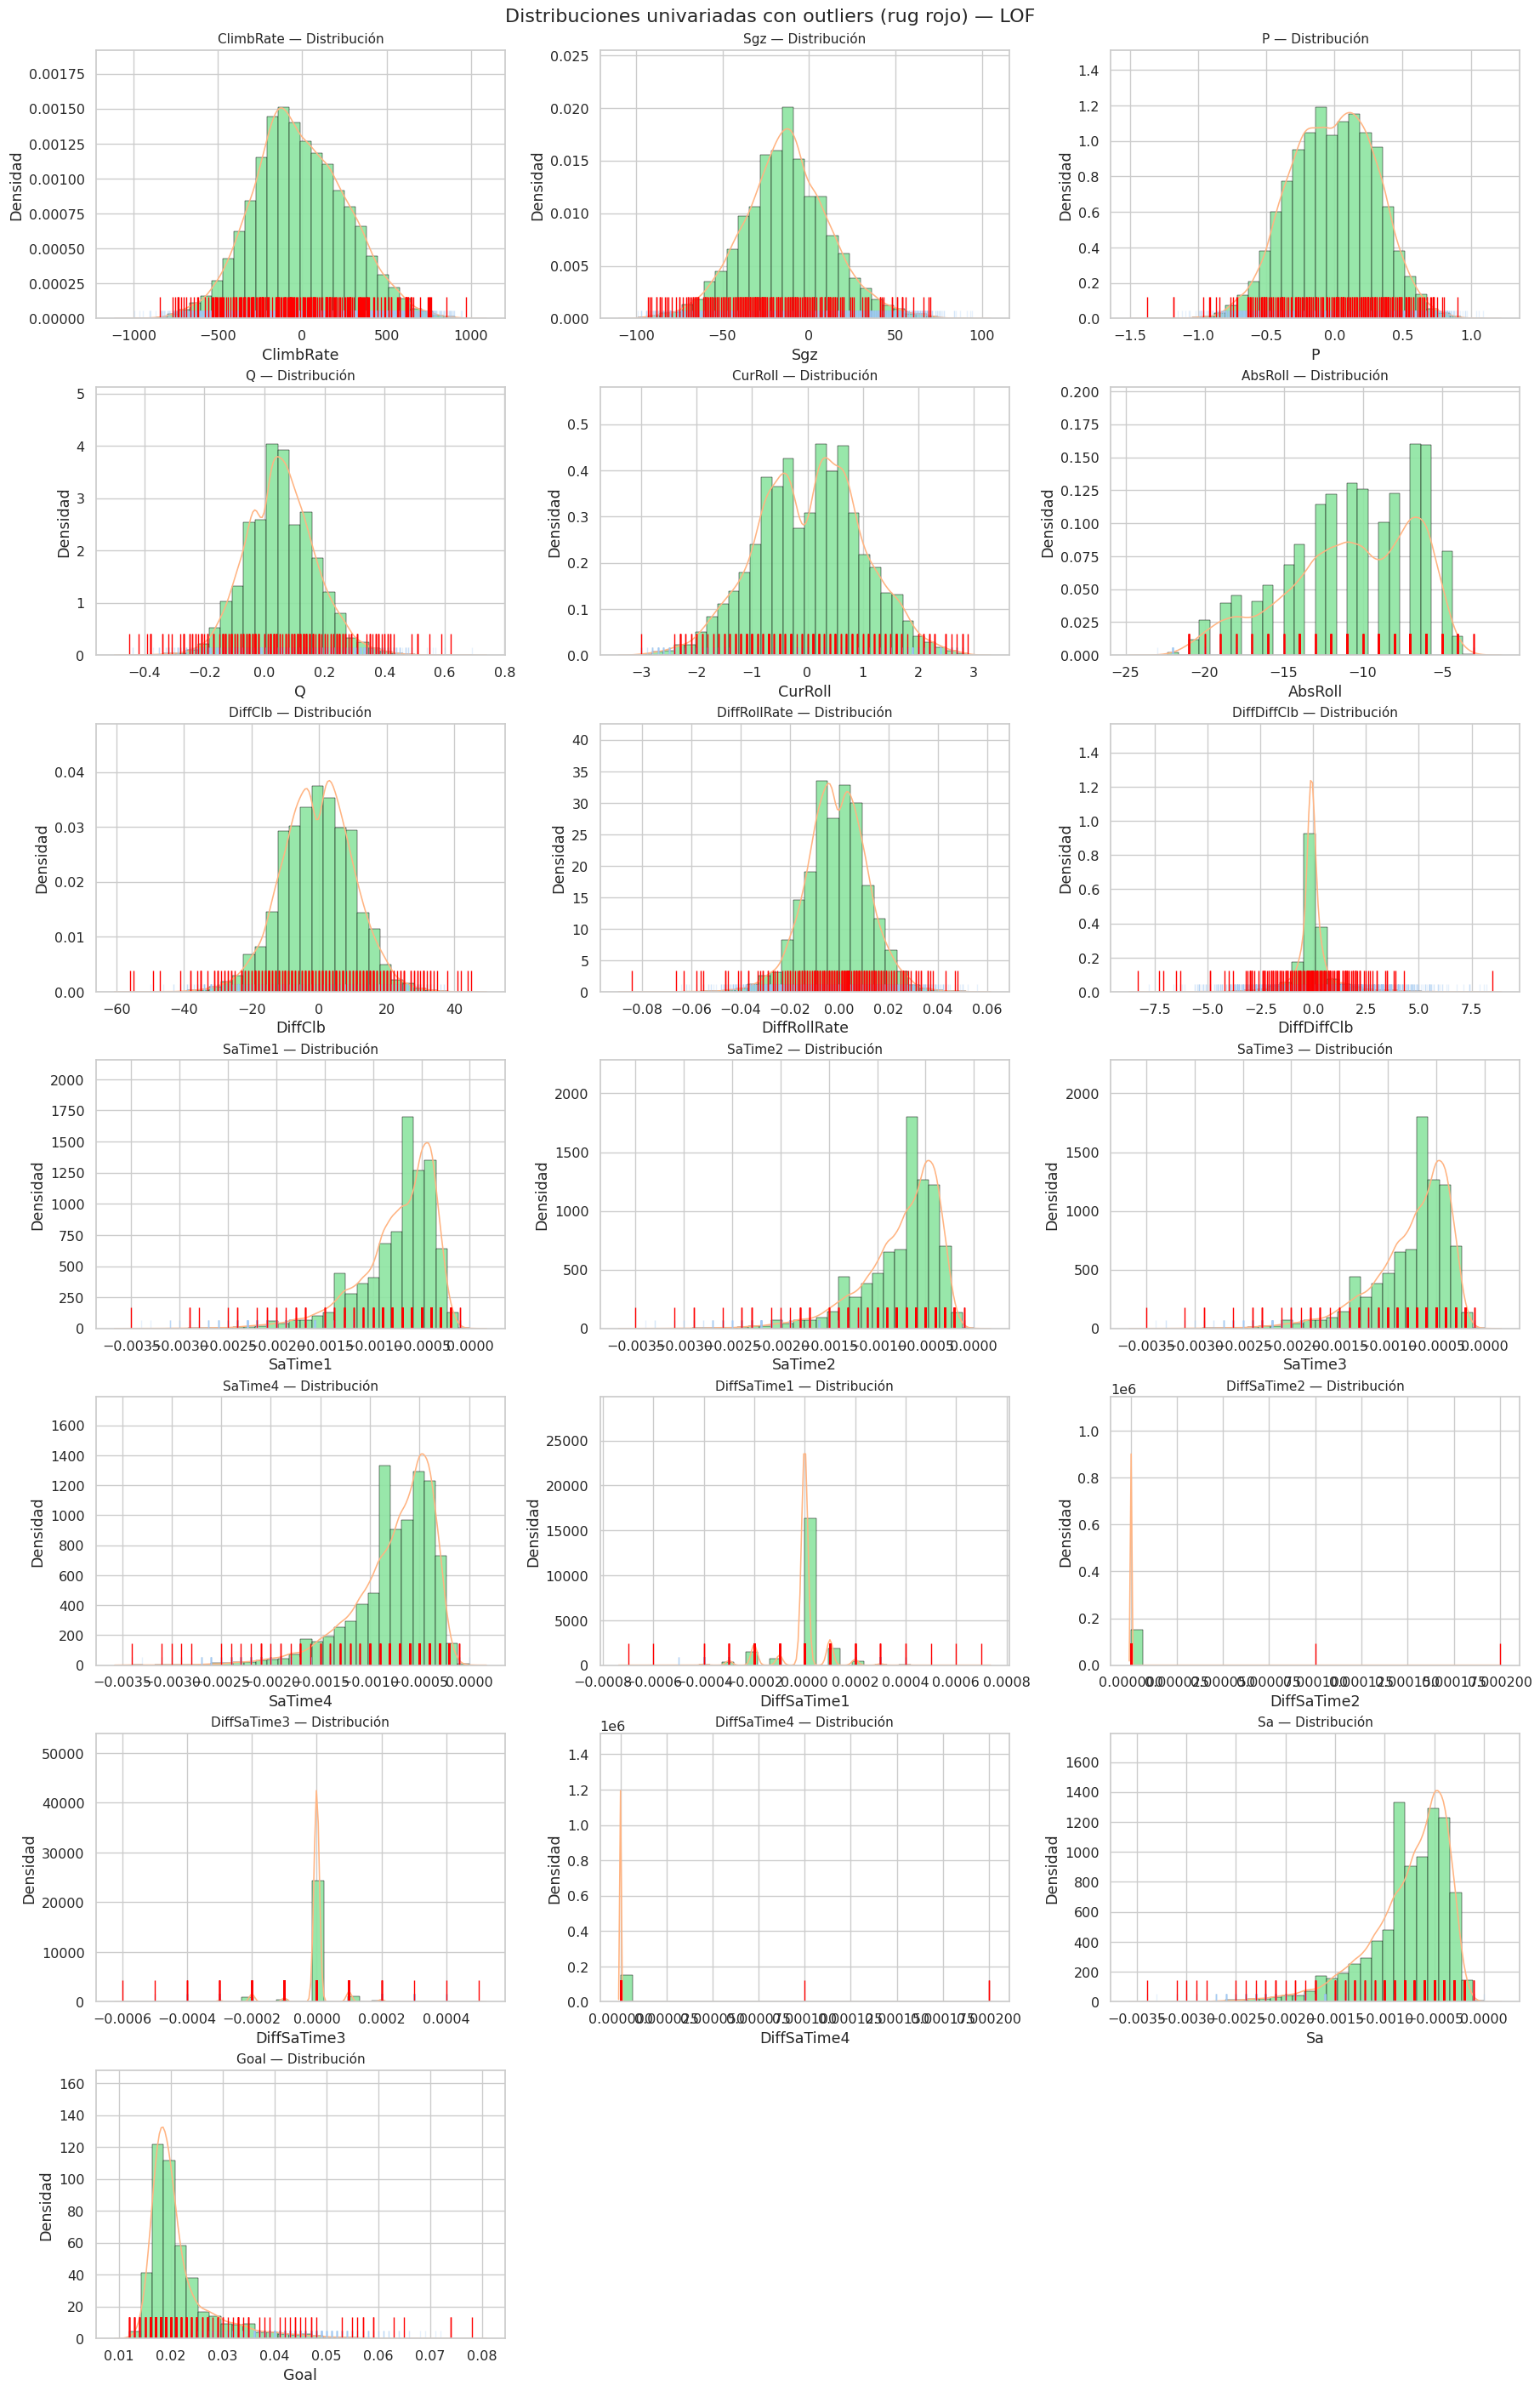

In [10]:

# Distribuciones univariadas: hist + KDE + rug con outliers en rojo
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15, fill=False)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")
    # rug para inliers (sutil)
    sns.rugplot(df.loc[~df["is_outlier"], col], ax=ax, height=0.03, alpha=0.25)
    # rug para outliers (destacado en rojo)
    sns.rugplot(df.loc[df["is_outlier"], col], ax=ax, height=0.08, color="red")


for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Distribuciones univariadas con outliers (rug rojo) — LOF", fontsize=16)
plt.show()

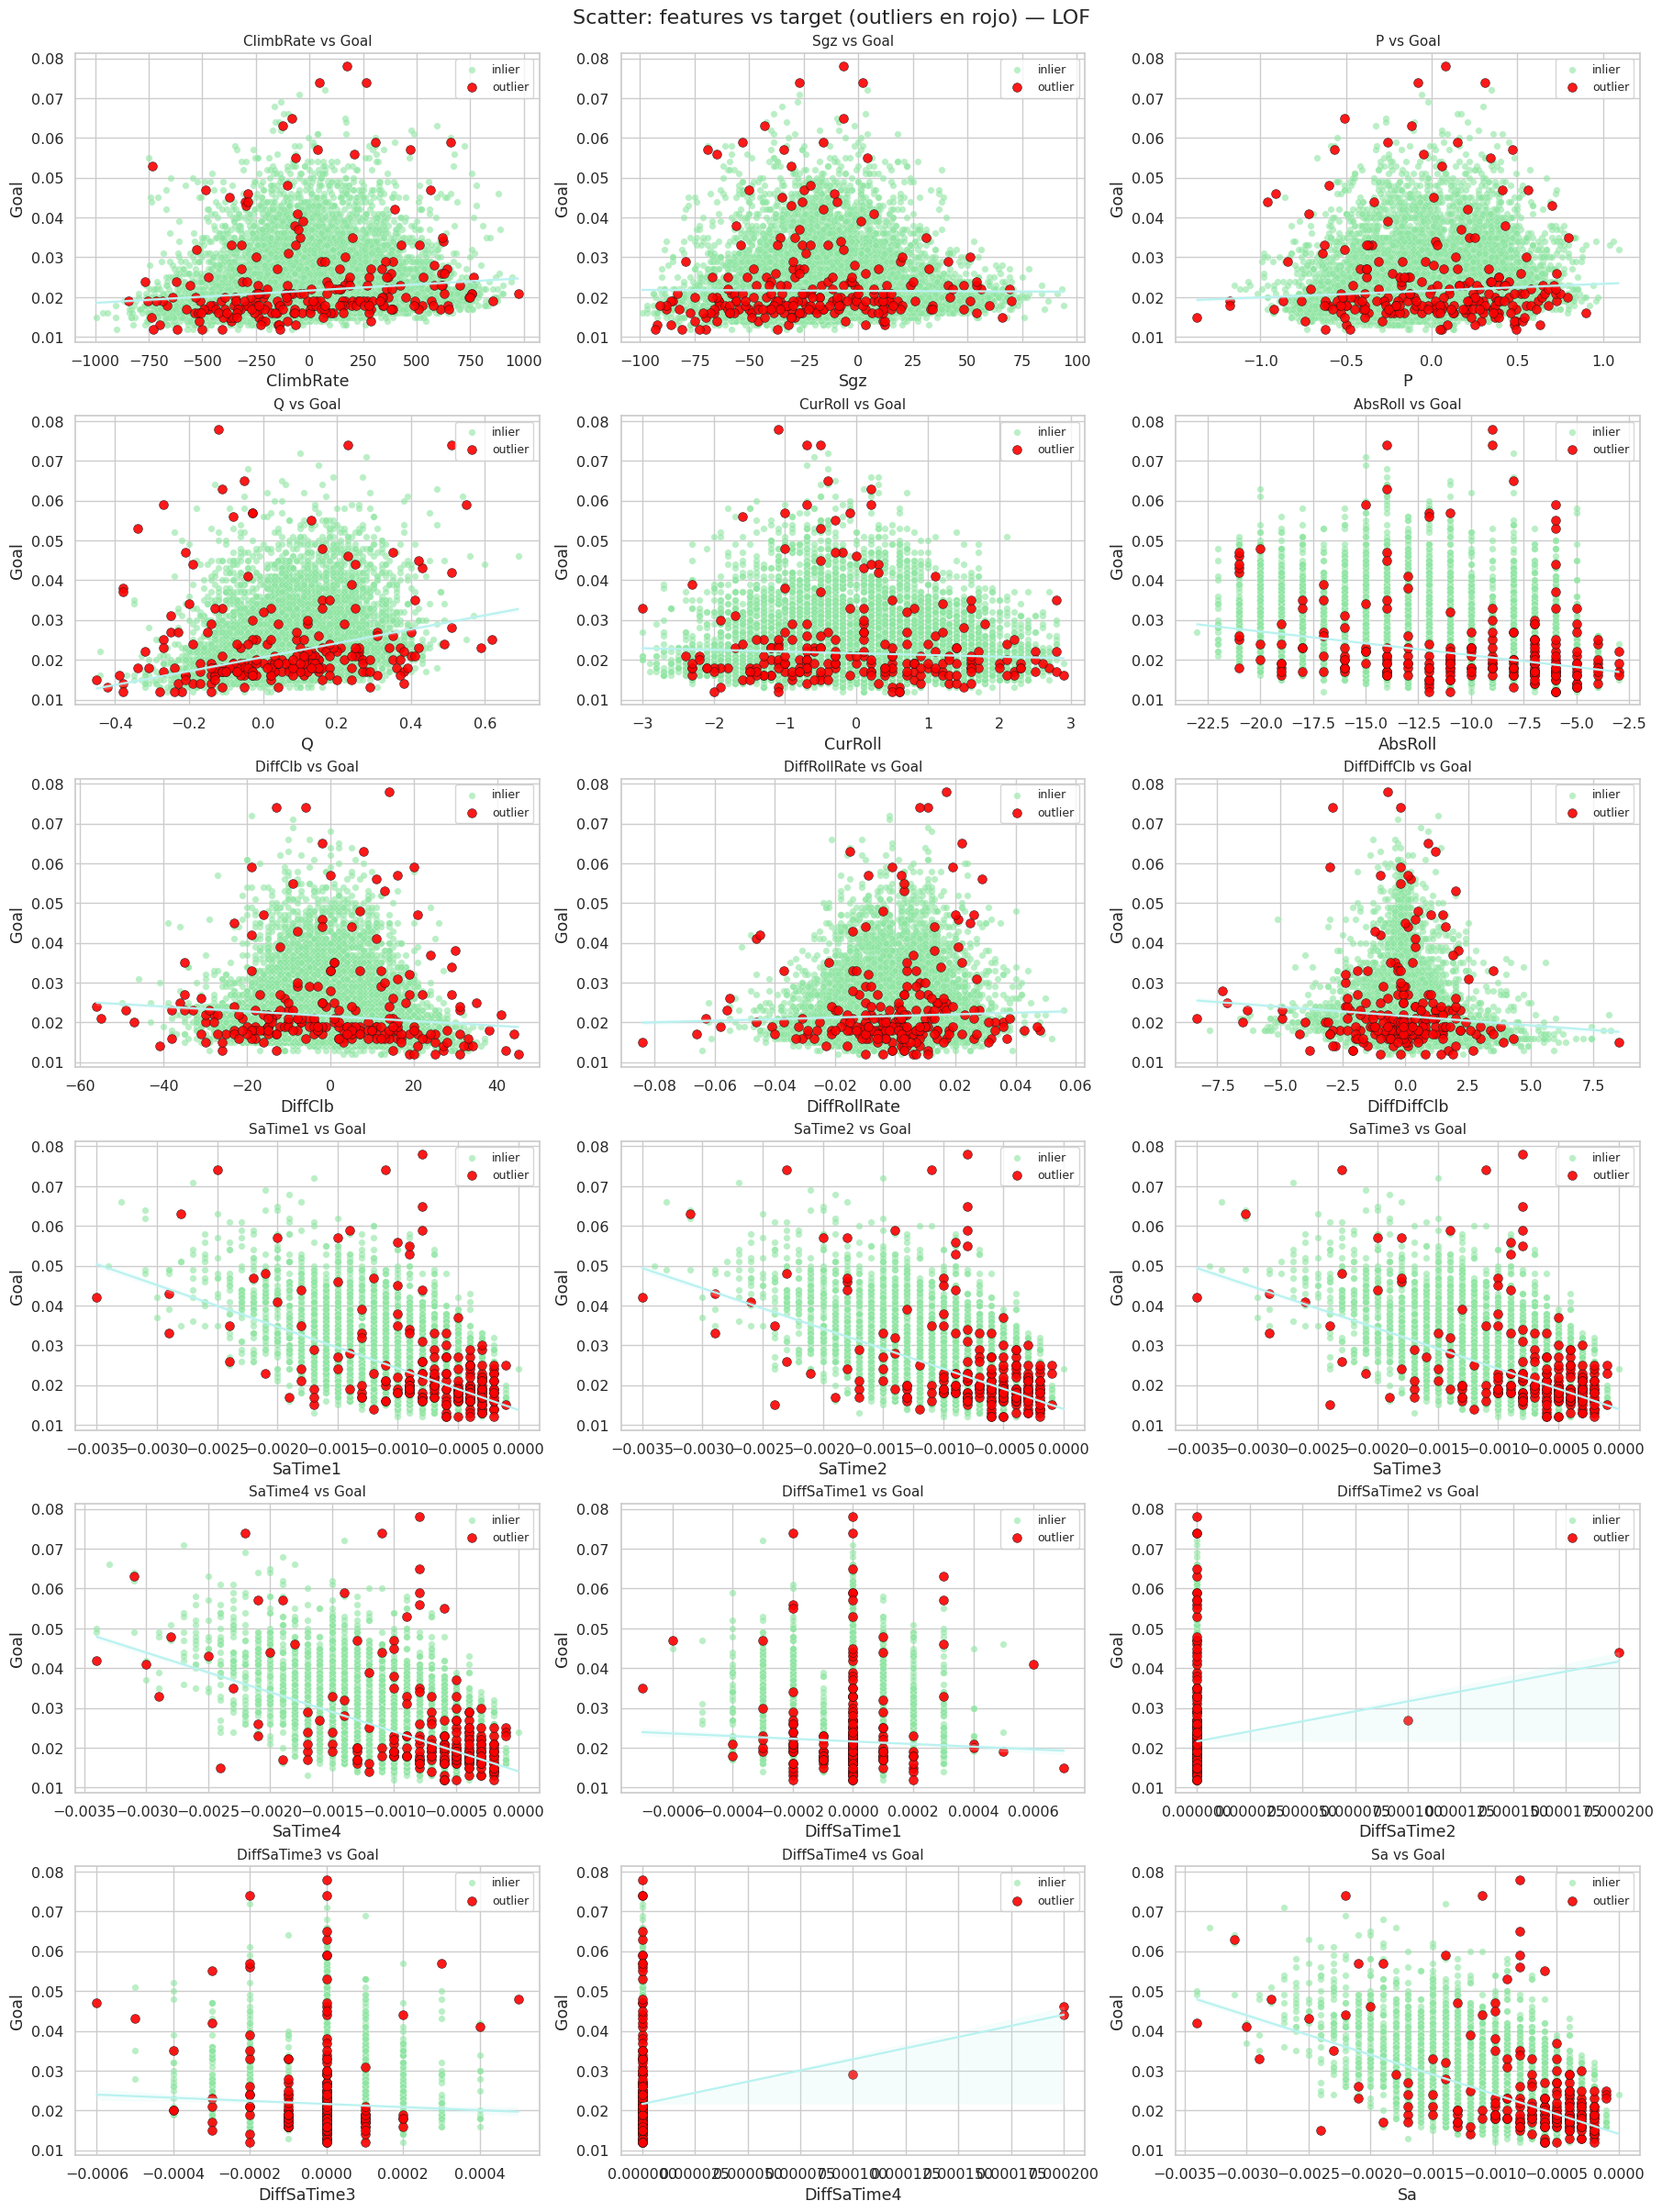

In [11]:
target = "Goal"
features_no_target = [c for c in features if c != target]
n2 = len(features_no_target)
rows2 = math.ceil(n2 / cols_per_row)

fig, axes = plt.subplots(rows2, cols_per_row, figsize=(18, 4*rows2), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features_no_target):
    ax = axes[i]
    # plot inliers
    sns.scatterplot(x=df.loc[~df["is_outlier"], feat], y=df.loc[~df["is_outlier"], target],
                    ax=ax, color=color_main, s=28, alpha=0.6, edgecolor="w", linewidth=0.2, label="inlier")
    # plot outliers in red
    sns.scatterplot(x=df.loc[df["is_outlier"], feat], y=df.loc[df["is_outlier"], target],
                    ax=ax, color="red", s=50, alpha=0.9, edgecolor="k", linewidth=0.4, label="outlier")
    # tendencia sobre todos los datos
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, line_kws={"color": color_accent, "linewidth":1.6})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.legend(loc="best", fontsize=9)

for j in range(n2, rows2*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Scatter: features vs target (outliers en rojo) — LOF", fontsize=16)
plt.show()

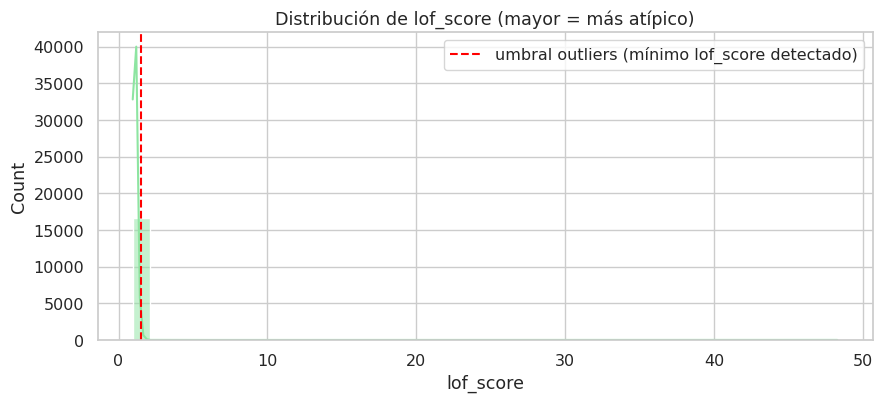

In [12]:
# Mapa de scores LOF (histograma + top outliers)
plt.figure(figsize=(10,4))
sns.histplot(df["lof_score"], bins=40, kde=True, color=color_main)
plt.title("Distribución de lof_score (mayor = más atípico)")
plt.xlabel("lof_score")
plt.axvline(df.loc[df['is_outlier'], 'lof_score'].min(), color="red", linestyle="--",
            label="umbral outliers (mínimo lof_score detectado)")
plt.legend()
plt.show()

In [13]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 1. Define la rejilla completa de hiperparámetros
neighbors_grid = [3, 9, 15, 27, 49]
metric_grid = ['euclidean', 'manhattan', 'minkowski']

results = []

print("Iniciando búsqueda manual en rejilla...")

for n_neighbors, metric in product(neighbors_grid, metric_grid):

    # Crea la instancia de LOF con la combinación actual
    lof = LocalOutlierFactor(
        n_neighbors=n_neighbors,
        metric=metric,
        novelty=False
    )

    # Ajusta y predice
    y_pred = lof.fit_predict(X_scaled)

    # Calcula las métricas
    lof_score = -lof.negative_outlier_factor_
    n_outliers = (y_pred == -1).sum()

    # Calcula el score medio solo si se encontraron outliers
    mean_lof = lof_score[y_pred == -1].mean() if n_outliers > 0 else 0.0

    # Guarda los resultados
    results.append({
        "n_neighbors": n_neighbors,
        "metric": metric,
        "n_outliers": n_outliers,
        "mean_lof_score": mean_lof
    })

print("¡Búsqueda finalizada!")

df_grid = pd.DataFrame(results)


df_grid_sorted = df_grid.sort_values(by="mean_lof_score", ascending=False).reset_index(drop=True)

print("\n--- Top 5 Mejores Combinaciones (según Mean LOF Score) ---")
display(df_grid_sorted.head())

Iniciando búsqueda manual en rejilla...
¡Búsqueda finalizada!

--- Top 5 Mejores Combinaciones (según Mean LOF Score) ---


n_neighbors     metric  n_outliers  mean_lof_score
0           27  euclidean         226        2.141214
1           27  minkowski         226        2.141214
2           15  euclidean         231        2.140635
3           15  minkowski         231        2.140635
4            9  euclidean         245        2.098947

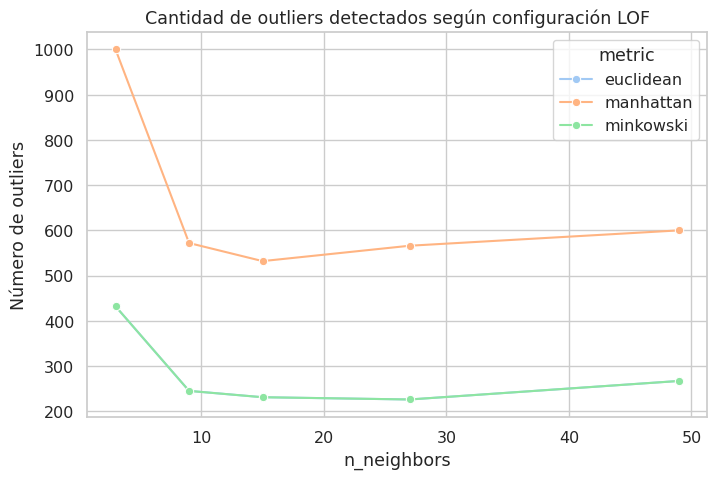

In [14]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_grid, x="n_neighbors", y="n_outliers", hue= 'metric', marker="o", palette="pastel")
plt.title("Cantidad de outliers detectados según configuración LOF")
plt.ylabel("Número de outliers")
plt.xlabel("n_neighbors")
plt.show()


In [15]:
# Crear un DataFrame limpio sin outliers
df_clean = df[~df["is_outlier"]].copy()

print(f"Dataset original: {df.shape[0]} filas")
print(f"Outliers eliminados: {df['is_outlier'].sum()}")
print(f"Dataset limpio: {df_clean.shape[0]} filas")

# Vista rápida de los primeros registros
display(df_clean.head())


Dataset original: 16599 filas
Outliers eliminados: 233
Dataset limpio: 16366 filas


ClimbRate   Sgz     P     Q  CurRoll  AbsRoll  DiffClb  DiffRollRate  \
0     -178.0  40.0 -0.11  0.13      1.1     -9.0    -12.0        -0.011   
1     -122.0   9.0  0.27  0.05      0.0    -10.0     -2.0        -0.005   
2      196.0 -10.0 -0.44  0.10      0.6    -10.0     -7.0         0.003   
3      507.0  -6.0  0.14  0.10     -0.2    -10.0      2.0         0.001   
4     -189.0 -67.0 -0.60 -0.08      0.5    -14.0     17.0        -0.017   

   DiffDiffClb  SaTime1  ...  SaTime3  SaTime4  DiffSaTime1  DiffSaTime2  \
0          0.0  -0.0007  ...  -0.0007  -0.0007       0.0000          0.0   
1          0.4  -0.0007  ...  -0.0007  -0.0007       0.0000          0.0   
2          0.2  -0.0006  ...  -0.0006  -0.0006       0.0000          0.0   
3         -0.7  -0.0007  ...  -0.0006  -0.0006      -0.0001          0.0   
4         -0.7  -0.0013  ...  -0.0013  -0.0013       0.0000          0.0   

   DiffSaTime3  DiffSaTime4      Sa   Goal  lof_score  is_outlier  
0          0.0          0.0 -0.0007  0.018   1.063562       False  
1          0.0          0.0 -0.0007  0.017   1.183549       False  
2          0.0          0.0 -0.0006  0.021   1.197780       False  
3          0.0          0.0 -0.0006  0.024   1.384484       False  
4          0.0          0.0 -0.0013  0.018   1.188087       False  

[5 rows x 21 columns]

In [16]:
df_clean.to_csv("Elevators_cleanLOF.csv", index=False)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

df = pd.read_csv("Elevators_cleanLOF.csv")

X = df.drop(columns=["Goal","lof_score","is_outlier"])
y = df["Goal"]

features_numericas = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
features_categoricas = X.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), features_numericas),
        ("cat", OneHotEncoder(drop="first"), features_categoricas)
    ]
)

models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

print("=== Evaluación con Validación Cruzada (MAE) ===")
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
    print(f"{name}: MAE promedio = {-scores.mean():.4f} (+/- {scores.std():.4f})")

param_grids = {
    "Ridge": {"regressor__alpha": [0.01, 0.1, 1, 10, 100]},
    "Lasso": {"regressor__alpha": [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {
        "regressor__alpha": [0.001, 0.01, 0.1, 1, 10],
        "regressor__l1_ratio": [0.2, 0.5, 0.8]
    }
}

print("\n=== Ajuste de Hiperparámetros ===")
best_models = {}

for name, grid in param_grids.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", models[name])
    ])
    search = GridSearchCV(pipe, grid, cv=5, scoring="neg_mean_absolute_error")
    search.fit(X, y)
    print(f"{name} -> Mejor MAE: {-search.best_score_:.4f} | Parámetros: {search.best_params_}")
    best_models[name] = search.best_estimator_

best_model_name = min(best_models, key=lambda k: -best_models[k].score(X, y))
print(f"\n✅ Mejor modelo final según MAE: {best_model_name}")


=== Evaluación con Validación Cruzada (MAE) ===
Linear: MAE promedio = 0.0020 (+/- 0.0000)
Ridge: MAE promedio = 0.0020 (+/- 0.0000)
Lasso: MAE promedio = 0.0045 (+/- 0.0001)
ElasticNet: MAE promedio = 0.0045 (+/- 0.0001)

=== Ajuste de Hiperparámetros ===
Ridge -> Mejor MAE: 0.0020 | Parámetros: {'regressor__alpha': 100}
Lasso -> Mejor MAE: 0.0033 | Parámetros: {'regressor__alpha': 0.001}


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.968e-04, tolerance: 5.686e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e-04, tolerance: 5.809e-05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e-04, tolerance: 5.681e

ElasticNet -> Mejor MAE: 0.0021 | Parámetros: {'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.2}

✅ Mejor modelo final según MAE: Ridge


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.212e-04, tolerance: 7.164e-05
  model = cd_fast.enet_coordinate_descent(
